<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/TitanicDataOutliersUnderstanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

In [40]:
df=pd.read_csv('titanic.csv')

In [41]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [42]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [43]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


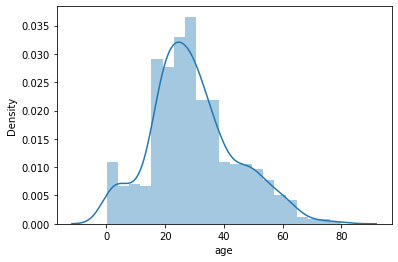

In [44]:

sns.distplot(df.age.dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


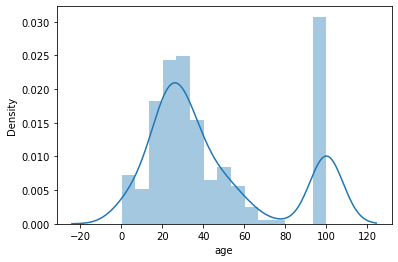

In [45]:
sns.distplot(df.age.fillna(100))

Text(0, 0.5, 'No of passengers')

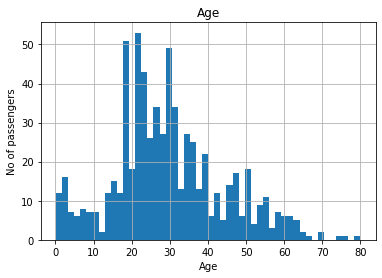

In [46]:
figure = df.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

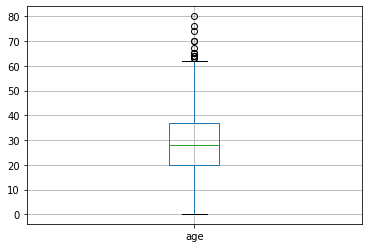

In [47]:
figure = df.boxplot(column='age')

In [48]:
df.age.describe()

count    676.000000
mean      29.519847
std       14.562243
min        0.166700
25%       20.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64

In [49]:
#### Assuming age follows a gaurssian distribution we will calculate the boudaries which differentiate the outliers
upper_boundary = df.age.mean() + 3 * df.age.std()
lower_boundary = df.age.mean() - 3 * df.age.std()

In [50]:
print(upper_boundary)
print(lower_boundary)
print(df.age.mean())

73.20657749172578
-14.166883113027552
29.519847189349115


Text(0, 0.5, 'No of passengers')

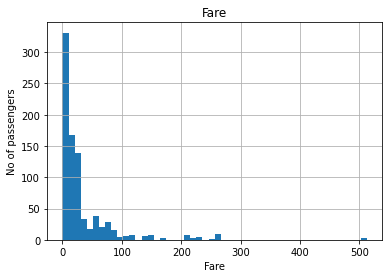

In [51]:
figure = df.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


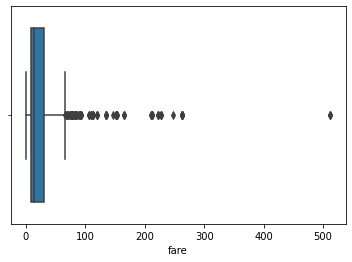

In [52]:
sns.boxplot('fare', data=df)

In [53]:
df['fare'] = df.fare.fillna(df.fare.median())

In [54]:
### Let's compute the interquantile range to calculate the boundries
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

In [55]:
lower_bridge = df.fare.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.fare.quantile(0.75) + (IQR * 1.5)

In [56]:
data = df.copy()

In [57]:
data.loc[df['age'] >= 73, 'age'] = 73

In [58]:
data.loc[df['fare'] >= 100, 'fare'] = 100

Text(0, 0.5, 'No of passengers')

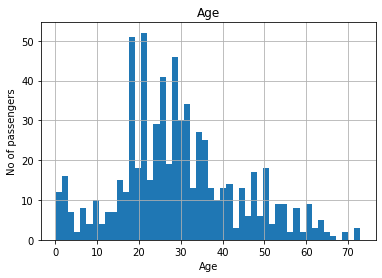

In [59]:
figure = data.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

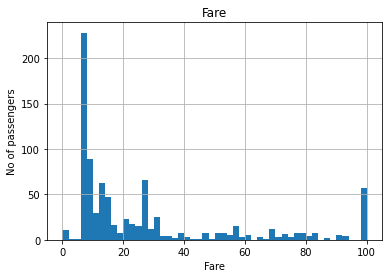

In [60]:
figure = data.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [63]:
pclass = pd.get_dummies(data['pclass'], drop_first=False,prefix='pclass')
pclass.head()

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [64]:
data = pd.concat([data,pclass], axis=1)

In [65]:
data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [66]:
data[['age','fare']]=data[['age', 'fare']].fillna(0)

In [67]:
sex = pd.get_dummies(data['sex'], drop_first=True,prefix='sex')

In [68]:
sex.head()

,sex_male
0,0
1,1
2,0
3,0
4,1


In [69]:
data = pd.concat([data,sex], axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data[['age','fare','pclass_1','pclass_2','pclass_3','sex_male']], data['survived'], test_size=0.3)

In [71]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[127  25]
 [ 42  61]]
Accuracy Score: 0.7372549019607844
Roc_Auc_Score: 0.778679100664282


In [72]:
### Logistic Regression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[127  25]
 [ 35  68]]
Accuracy Score: 0.7647058823529411
Roc_Auc_Score: 0.8140329586101175


In [73]:
import numpy as np

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of featuers to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf =  [1, 2, 4]

# Create thre random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['entropy', 'gini']
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


In [78]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                n_iter=50, cv=2, verbose=2, random_state=100, n_jobs=-1)

In [79]:
rf_randomcv.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [80]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 340,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [81]:
randomcv_best_params = rf_randomcv.best_estimator_

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = randomcv_best_params.predict(X_test)
print("<-------------------Confusion metrics results is ------------->\n : {}".format(confusion_matrix(y_test, y_pred)))
print("<------------------Classification report is---------------> \n: {}".format(classification_report(y_test, y_pred)))
print("<------------------ Accuracy score----------------> : {}".format(accuracy_score(y_test, y_pred)))

<-------------------Confusion metrics results is ------------->
 : [[128  24]
 [ 34  69]]
<------------------Classification report is---------------> 
:               precision    recall  f1-score   support

           0       0.79      0.84      0.82       152
           1       0.74      0.67      0.70       103

    accuracy                           0.77       255
   macro avg       0.77      0.76      0.76       255
weighted avg       0.77      0.77      0.77       255

<------------------ Accuracy score----------------> : 0.7725490196078432


In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_leaf'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200,
                    rf_randomcv.best_params_['n_estimators'] - 100,
                    rf_randomcv.best_params_['n_estimators'],
                    rf_randomcv.best_params_['n_estimators'] + 100,
                    rf_randomcv.best_params_['n_estimators'] + 200,
                    rf_randomcv.best_params_['n_estimators'] - 600,]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [1, 2, 3, 4, 3], 'n_estimators': [0, 100, 200, 300, 400, -400]}


In [85]:

rf =  RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 140, in _validate_estimator
    self.n_estimators
ValueError: n_estimators must be greater than zero, got 0.



GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [340],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 3],
                         'n_estimators': [0, 100, 200, 300, 400, -400]},
             verbose=2)

In [86]:

grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_split=4, n_estimators=200)

In [87]:
clf = RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_split=4, n_estimators=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [88]:
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[130  22]
 [ 36  67]]
Accuracy Score: 0.7725490196078432
Roc_Auc_Score: 0.8158533469596321
